# <div style="text-align: center;"> <span style="color: #8B008B; font-weight: bold;">Decision Tree Classifier To Predict Customer Purchase</span> </div> 

## 
---
**Name** : **ANJALI J**

**Company** : **Prodigy InfoTech**

**Task 3**

---

## <span style="color:#00CED1"><strong>Problem Statement</strong></span>

## **Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

## <span style="color:#00CED1"><strong>About the dataset</strong></span>

#### The Bank Marketing dataset contains information about clients of a Portuguese bank and their responses to a direct marketing campaign.  The Bank Marketing dataset from the UCI Machine Learning Repository is widely used for classification tasks, particularly in predicting whether a client will subscribe to a term deposit. The main objective of the dataset is to predict whether a customer will subscribe to a term deposit (yes or no).

## <span style="color:#00CED1"><strong>Importing required libraries</strong></span>

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from joblib import dump

## <span style="color:#00CED1"><strong>Loading the dataset</strong></span>

In [2]:
df=pd.read_csv("bank_marketting_dataset.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## <span style="color:#00CED1"><strong>Data Description</strong></span>


---
#### <span style="color:red"><strong>Source</strong></span> : [Click Here](https://www.canva.com/link?target=https%3A%2F%2Farchive.ics.uci.edu%2Fml%2Fdatasets%2FBank%2BMarketing&design=DAFpRxy47kU&accessRole=viewer&linkSource=document)

---

Here is a description of each column in the population dataset :
* age: Age of the client (numeric).
* job: Job type (categorical, e.g., "admin", "technician").
* marital: Marital status (categorical, e.g., "married", "single").
* education: Level of education (categorical, e.g., "primary", "secondary").
* default: Has credit in default? (yes/no).
* housing: Has housing loan? (yes/no).
* loan: Has personal loan? (yes/no).
* contact: Contact communication type (e.g., "cellular", "telephone").
* month: Last contact month of the year (categorical, e.g., "jan", "feb").
* day_of_week: Usually contains categorical values representing the days of the week.
* duration: Last contact duration in seconds (numeric).
* campaign: Number of contacts performed during this campaign (numeric).
* pdays: Number of days since the client was last contacted (numeric; -1 means not previously contacted).
* previous: Number of contacts performed before this campaign (numeric).
* poutcome: Outcome of the previous marketing campaign (categorical, e.g., "success", "failure").
* emp.var.rate: The rate of change in employment, often expressed as a percentage. Positive values indicate an increase in employment and Negative values indicate a decrease in employment.
* cons.price.idx: Represents the consumer price index (CPI) for a particular period during which the data was collected.
* cons.conf.idx: Economic indicator that reflects how optimistic or pessimistic consumers are about their expected financial situation.
* euribor3m: Euribor stands for Euro Interbank Offered Rate. It is a daily reference rate published for short-term euro-denominated interbank loans.
* nr.employed: Indicates the total number of employees in thousands.
* y: Indicates if the client subscribed to a term deposit (yes/no). It is the target variable. 

## <span style="color:#00CED1"><strong>Overview of the dataset</strong></span>

In [3]:
df.shape

(41188, 21)

#### Dataset contains 41188 rows and 21 columns.

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## <span style="color:#00CED1"><strong>Data Cleaning</strong></span>

### **Finding missing values**

In [9]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### There are **no missing values** in the dataset.

### **Checking for "Unknown" values in categorical columns**

In [10]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].value_counts().get('unknown', 0)}")

job: 330
marital: 80
education: 1731
default: 8597
housing: 990
loan: 990
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0


#### There are "unknown" values in **job, marital, education, default, housing and loan.** They can be replaced with **mode**.

In [11]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan']:
    mode = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode)

In [12]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].value_counts().get('unknown', 0)}")

job: 0
marital: 0
education: 0
default: 0
housing: 0
loan: 0
contact: 0
month: 0
day_of_week: 0
poutcome: 0
y: 0


#### All **unknown** values are removed.

### **Renaming columns**

In [13]:
df.rename(columns={'poutcome' : 'previous_outcome',
                   'emp.var.rate' : 'empl_variation_rate',
                   'cons.price.idx' : 'consumer_price_index',
                   'cons.conf.idx' : 'consumer_confidence_index',
                   'euribor3m' : '3_m_euribor_rate',
                   'nr.employed' : 'number_of_employees'
                  },
          inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'previous_outcome', 'empl_variation_rate',
       'customer_price_index', 'customer_confidence_index', '3_m_euribor_rate',
       'number_of_employees', 'y'],
      dtype='object')

## <span style="color:#00CED1"><strong>Exploratory Data Analysis (EDA)</strong></span>

### **Distribution of numerical variables using Histplot**

In [14]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous',
       'empl_variation_rate', 'customer_price_index',
       'customer_confidence_index', '3_m_euribor_rate', 'number_of_employees'],
      dtype='object')

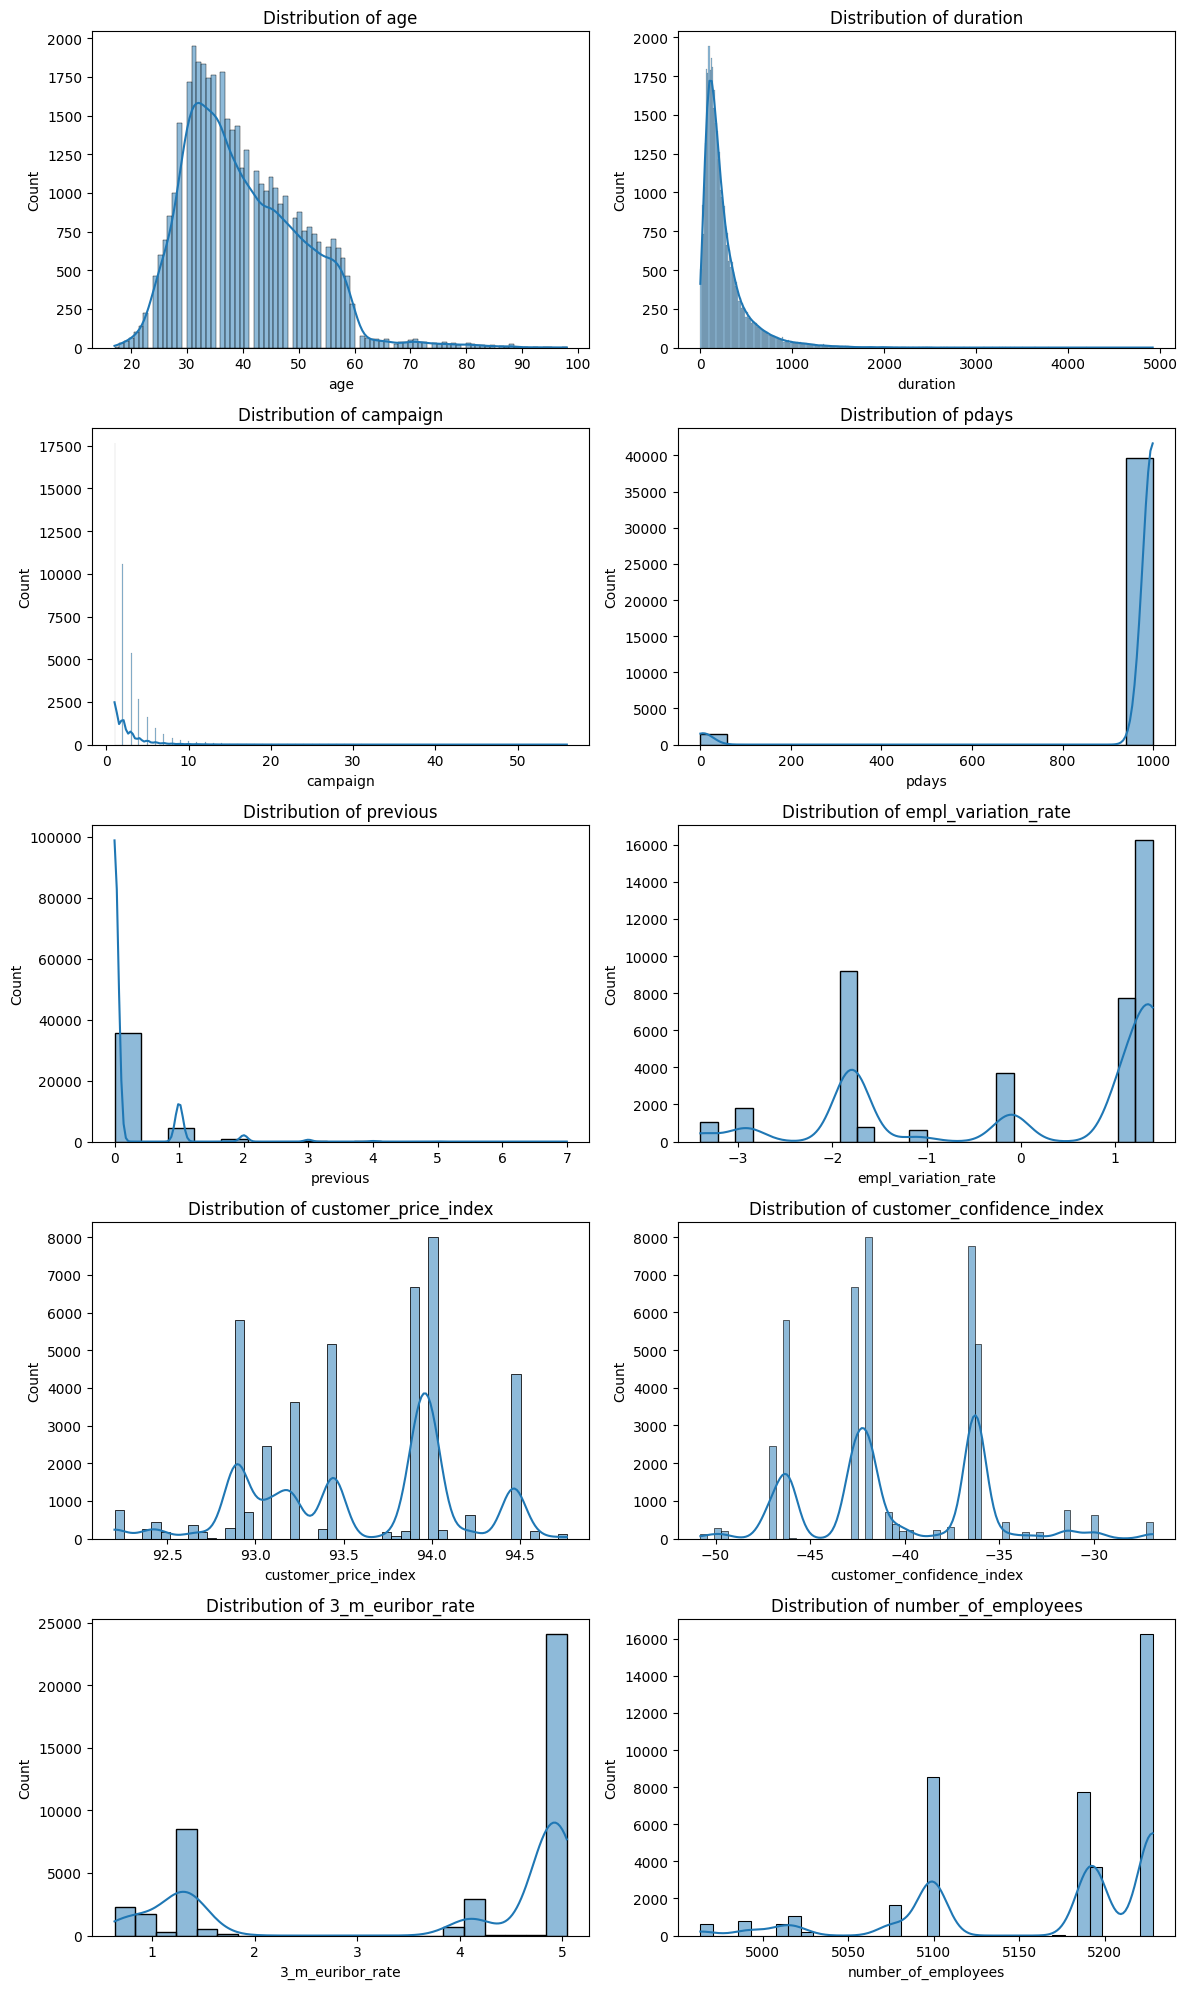

In [15]:
# Create subplots with a grid layout
num_cols = 2  # Number of columns in the grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten axes for easy indexing

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### **Insights** :
* Most of the clients are aged between 30 and 40 years.
* Most of the last call durations with the client lies within 15 minutes.
* Customer price index falls within a range of 93.0 to 94.5.
* Custumer confidence index of most of the clients lie between -47 to -37.

### **Distribution of categorical variables using count plot**

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'previous_outcome', 'y'],
      dtype='object')

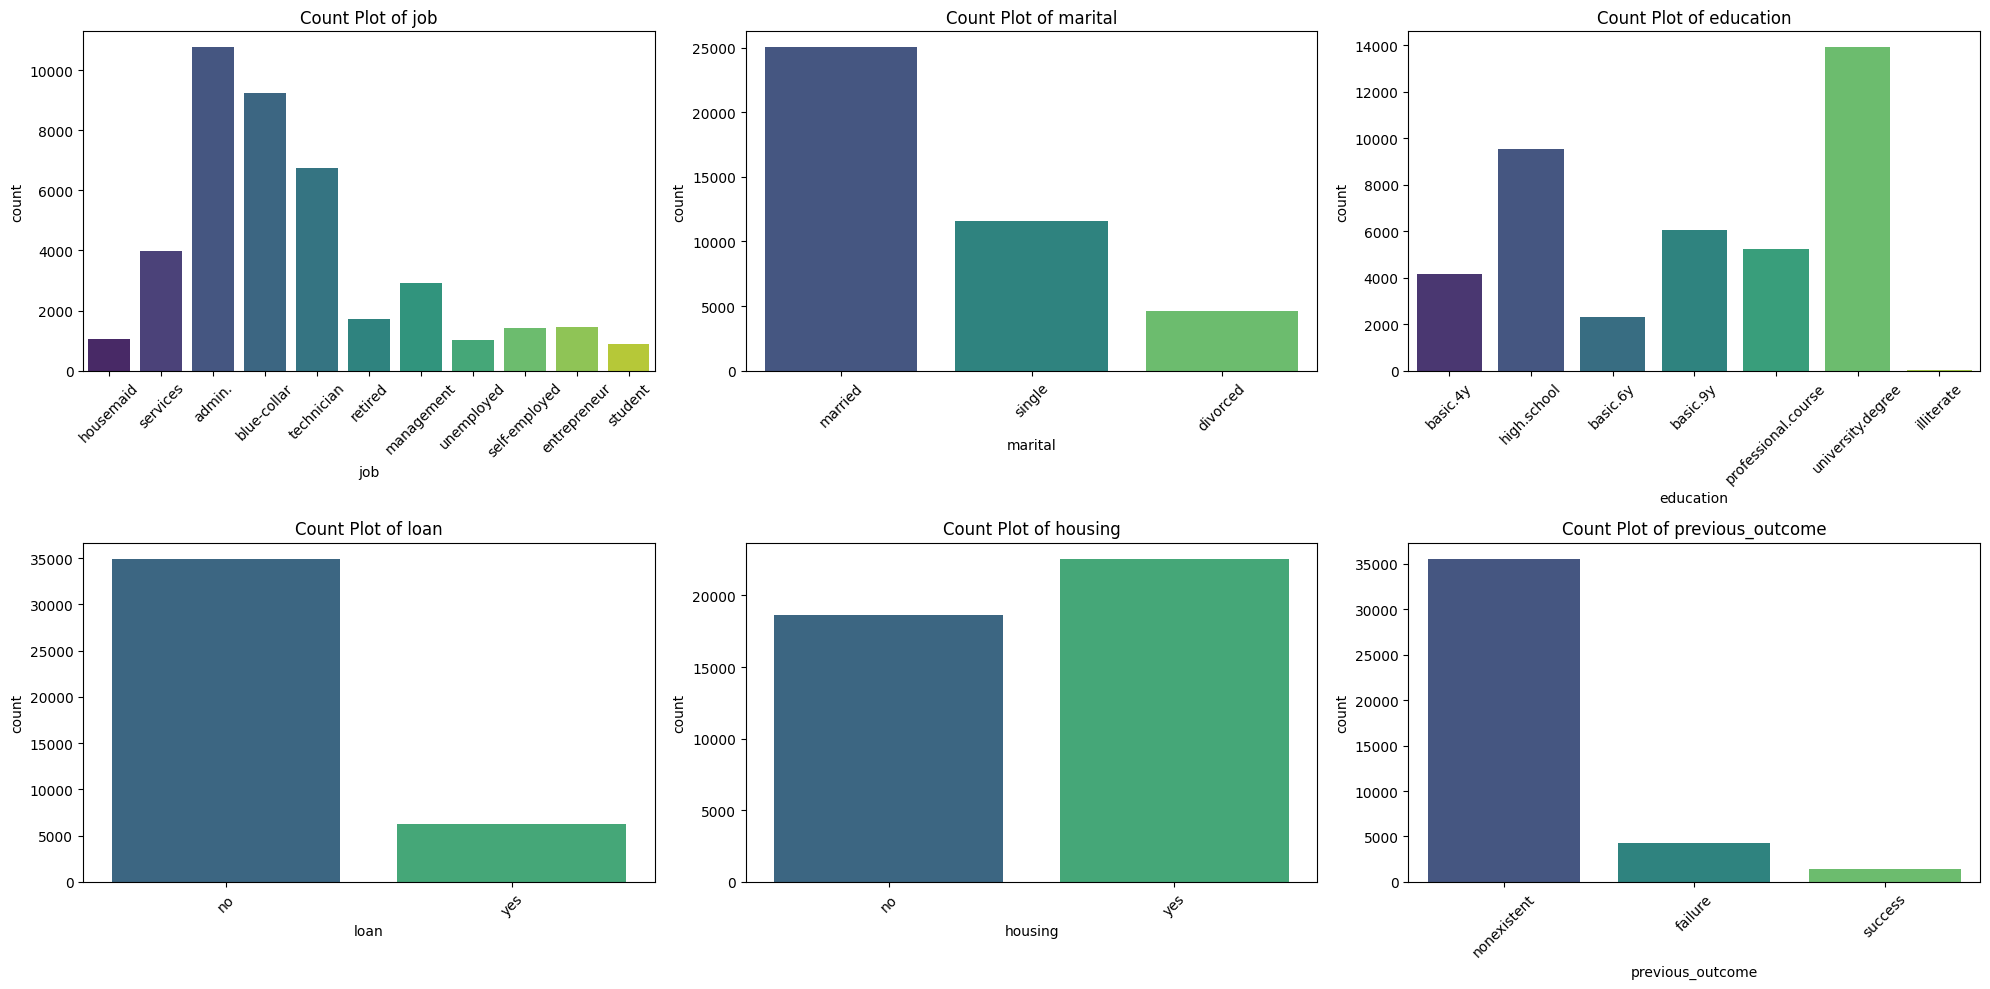

In [17]:
columns_to_plot = ['job', 'marital', 'education', 'loan', 'housing', 'previous_outcome']

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))

axes = axes.flatten()

# Plot each column
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### **Insights** :
* Most of the clients works in administration, blue-collar or technical fields.
* Most of the clients are married.
* Educational qualification of most of the clients are either University degree or high-school.
* Most of the clients have not taken any loans.
* Most of the clients have housing loans.
* Most of the clients have not attended any previous campaigns.

### **Correlation matrix**

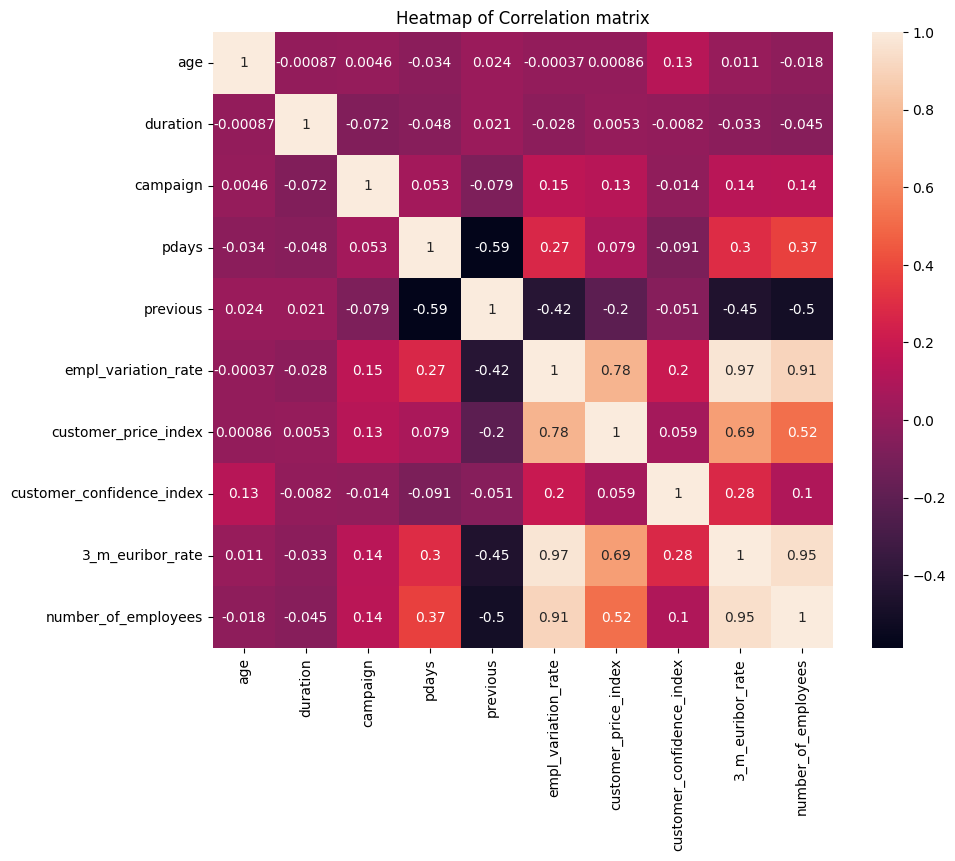

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_columns].corr(),annot=True, linecolor= 'black')
plt.title("Heatmap of Correlation matrix")
plt.show()

#### **Insights** :
 Columns which are highly correlated are :
 * Costumer Price Index and Employment Variation Rate.
 * Employment Variation Rate and 3 month Euribor rate.
 * Employment Variation Rate and Number of Employees.
 * Costumer Price Index and 3 month Euribor rate.

### **Handling Outliers**

#### **Box plot for numerical columns**

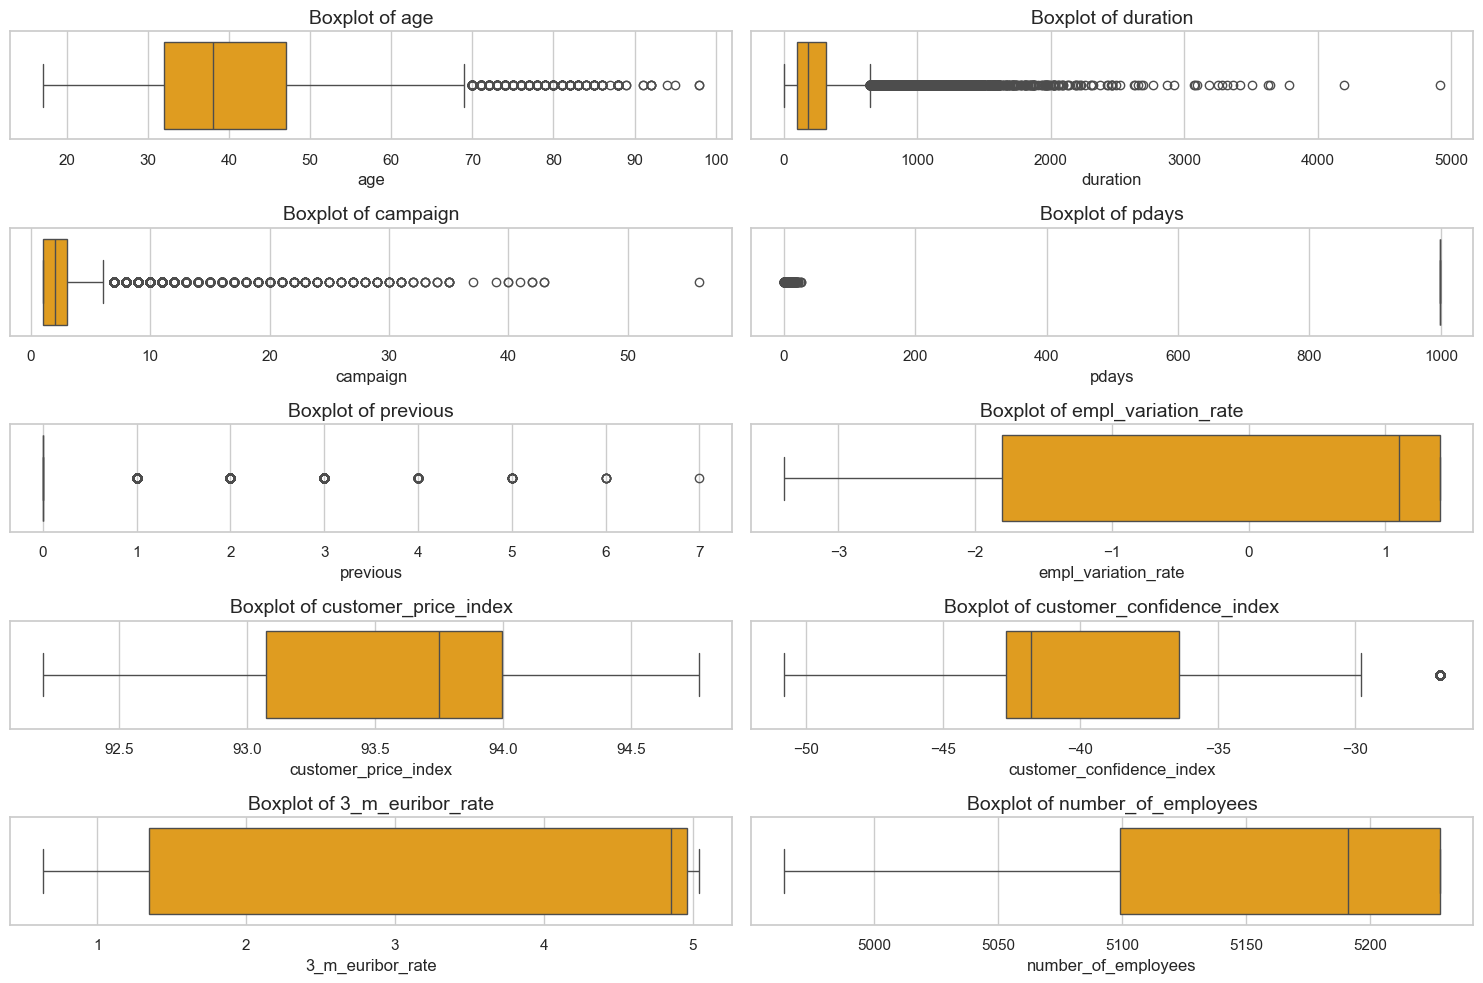

In [19]:
sns.set(style="whitegrid")

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))  
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)  
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

#### There are outliers in almost all the columns.

#### **Outlier removal using Z Score method**

In [20]:
def remove_outliers_zscore(data, column, threshold=3):
    # Calculate Z-scores
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    
    # Filter out rows with absolute Z-scores greater than the threshold
    return data[np.abs(z_scores) <= threshold]

# Remove outliers for multiple columns using Z-score
for column in numerical_columns:
    df = remove_outliers_zscore(df, column)

# Check the shape of the dataset after outlier removal
print(f"Dataset shape after outlier removal using Z-score: {df.shape}")

Dataset shape after outlier removal using Z-score: (36700, 21)


#### **Box plot of  numerical columns after outlier removal**

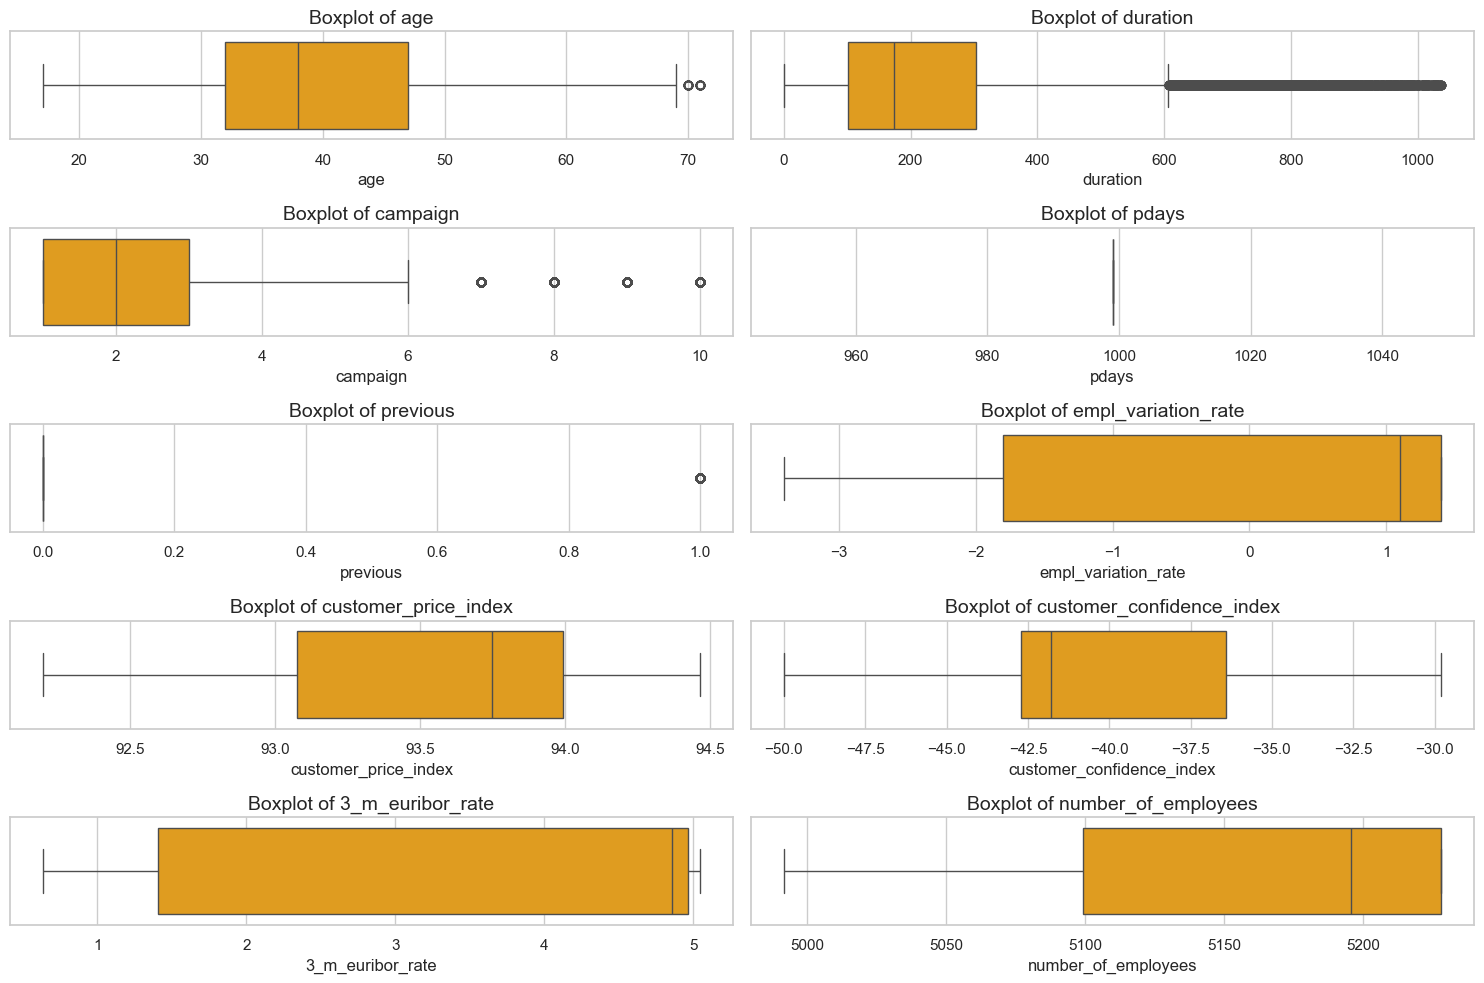

In [21]:
sns.set(style="whitegrid")

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))  
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 2, i)  
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

#### Some outliers are removed. Outliers may contain useful information. So, some outliers may be relevant for the dataset. Hence, all outliers cannot be removed.

## <span style="color:#00CED1"><strong>Feature Engineering</strong></span>

### **Encoding Categorical columns using Label Encoding**

In [22]:
label_encoder=LabelEncoder()
for col in categorical_columns:
    df[col]=label_encoder.fit_transform(df[col])

## <span style="color:#00CED1"><strong>Data Splitting</strong></span>

In [23]:
#X-Independent Feature, y=target feature

In [25]:
X=df.drop(columns=['y'])
y=df['y']

In [26]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

## <span style="color:#00CED1"><strong>Feature Selection</strong></span>

In [27]:
selector_kbest=SelectKBest(score_func=f_classif,k=10)
X_kbest=selector_kbest.fit_transform(X_train,y_train)
selected_indices_kbest=selector_kbest.get_support(indices=True)
selected_features_kbest=X_train.columns[selected_indices_kbest]
print("Selected features through SelectKbest feature selection are :\n", selected_features_kbest)

Selected features through SelectKbest feature selection are :
 Index(['marital', 'education', 'contact', 'month', 'duration', 'campaign',
       'empl_variation_rate', 'customer_price_index', '3_m_euribor_rate',
       'number_of_employees'],
      dtype='object')


In [55]:
df_selected = df[['marital', 'education', 'contact', 'month', 'duration', 'campaign',
       'empl_variation_rate', 'consumer_price_index', '3_m_euribor_rate',
       'number_of_employees' , 'y']]
print(df_selected.head())

   marital  education  contact  month  duration  campaign  \
0        1          0        1      6       261         1   
1        1          3        1      6       149         1   
2        1          3        1      6       226         1   
3        1          1        1      6       151         1   
4        1          3        1      6       307         1   

   empl_variation_rate  customer_price_index  3_m_euribor_rate  \
0                  1.1                93.994             4.857   
1                  1.1                93.994             4.857   
2                  1.1                93.994             4.857   
3                  1.1                93.994             4.857   
4                  1.1                93.994             4.857   

   number_of_employees  y  
0               5191.0  0  
1               5191.0  0  
2               5191.0  0  
3               5191.0  0  
4               5191.0  0  


In [29]:
df_selected.shape

(36700, 11)

In [36]:
X1=df_selected.drop('y',axis=1)
y1=df_selected['y']

X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.2, random_state=42)

## <span style="color:#00CED1"><strong>Feature Scaling</strong></span>

In [37]:
scaler=StandardScaler()
X1_train=scaler.fit_transform(X1_train)
X1_test=scaler.transform(X1_test)

## <span style="color:#00CED1"><strong>Model Building</strong></span>

In [31]:
model=DecisionTreeClassifier()

In [38]:
model.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [39]:
y_pred=model.predict(X1_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [40]:
print("Accuracy Score : ", accuracy_score(y1_test,y_pred))

Accuracy Score :  0.9095367847411444


In [41]:
print("Classification Report : \n", classification_report(y1_test,y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      6812
           1       0.39      0.45      0.41       528

    accuracy                           0.91      7340
   macro avg       0.67      0.70      0.68      7340
weighted avg       0.92      0.91      0.91      7340



## <span style="color:#00CED1"><strong>Hyperparameter Tuning</strong></span>

In [42]:
param_grid={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2'] 
}
grid_search=GridSearchCV(model, param_grid=param_grid,cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(X1_train,y1_train)
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [43]:
y_pred1=grid_search.predict(X1_test)

In [44]:
print("Accuracy Score after Hyperparameter tuning : ", accuracy_score(y1_test,y_pred1))

Accuracy Score after Hyperparameter tuning :  0.932016348773842


#### Accuracy Score has increased from **91%(approx.) to 93%** after hyperparameter tuning.

In [45]:
print("Classification Report after Hyperparameter tuning : \n", classification_report(y1_test,y_pred1))

Classification Report after Hyperparameter tuning : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      6812
           1       0.56      0.26      0.35       528

    accuracy                           0.93      7340
   macro avg       0.75      0.62      0.66      7340
weighted avg       0.92      0.93      0.92      7340



#### F1-score has increased from **95% to 96%** after hyperparameter tuning.

## <span style="color:#00CED1"><strong>Save the Model</strong></span>

In [46]:
dump(model, "DecisionTree_Model.joblib")

['DecisionTree_Model.joblib']

## <span style="color:#00CED1"><strong>Test with Unseen Data</strong></span>

In [47]:
#Load Model
from joblib import load
loaded_model=load("DecisionTree_Model.joblib")

In [48]:
unseen_data=pd.read_csv("unseen_.csv")
unseen_data.head()

,marital,education,contact,month,duration,campaign,empl_variation_rate,constumer_price_index,3_m_euribor_rate,number_of_employees
0,married,professional.course,telephone,may,139,1,1.1,93.994,4.857,5191.0
1,married,unknown,telephone,may,217,1,1.1,93.994,4.857,5191.0
2,single,high.school,telephone,may,342,1,1.1,93.994,4.857,5191.0
3,single,high.school,telephone,may,181,1,1.1,93.994,4.857,5191.0
4,married,high.school,telephone,may,172,1,1.1,93.994,4.857,5191.0


In [49]:
unseen_data.shape

(69, 10)

### **Encoding unseen data using Label Encoding**

In [50]:
for col in unseen_data.select_dtypes(include='object').columns :
    unseen_data[col]=label_encoder.fit_transform(unseen_data[col])

In [51]:
unseen_data.head()

,marital,education,contact,month,duration,campaign,empl_variation_rate,constumer_price_index,3_m_euribor_rate,number_of_employees
0,1,4,1,2,139,1,1.1,93.994,4.857,5191.0
1,1,6,1,2,217,1,1.1,93.994,4.857,5191.0
2,2,3,1,2,342,1,1.1,93.994,4.857,5191.0
3,2,3,1,2,181,1,1.1,93.994,4.857,5191.0
4,1,3,1,2,172,1,1.1,93.994,4.857,5191.0


### **Pipeline Implementation**

In [52]:
predictions=model.predict(unseen_data)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

## <span style="color:#00CED1"><strong>Conclusion</strong></span>

#### 
The Decision Tree Classifier achieved an accuracy of 93%, indicating it correctly predicted the target class for 93% of the data points.
However, the model is prone to overfitting, as evidenced by its performance drop on the test set compared to the training set. Hyperparameter tuning was used to reduce overfitting and improve generalization. For better accuracy, additional features like customer income or household size could be considered.